In [1]:
# matplotlib can require multiple lines of code to create a graph
# seaborn makes certain guesses which can result in the same plot in one line of code
# works easily with numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

%reload_ext autoreload
%autoreload

In [2]:
print(sb.get_dataset_names())

crash_df = sb.load_dataset("car_crashes")
crash_df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Plot

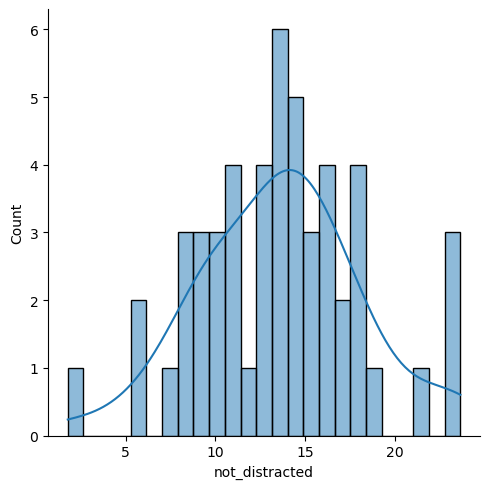

In [9]:
# univariate distribution - dist for one variable
# kde - kernel dnesity estimation with histogram provided
# kde false removes the kde
# bins define how many buckets the data will be grouped into
sb.displot(crash_df["not_distracted"], kde=True, bins = 25)

## Joint Plot

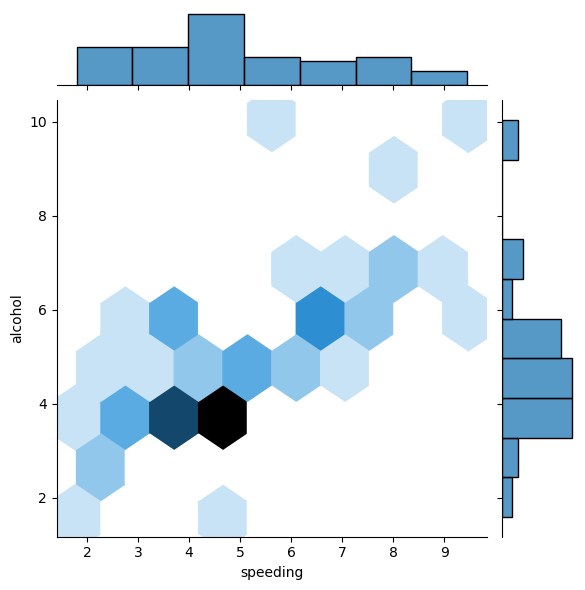

In [15]:
# Jointplot compares 2 dists and plots a scatter plot
# kind="reg" creates a regression line
# kind=kde creates a 2d kde
# kind=hex creates a hexagonal dist
sb.jointplot(x="speeding",y="alcohol", data=crash_df, kind="hex")

## KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

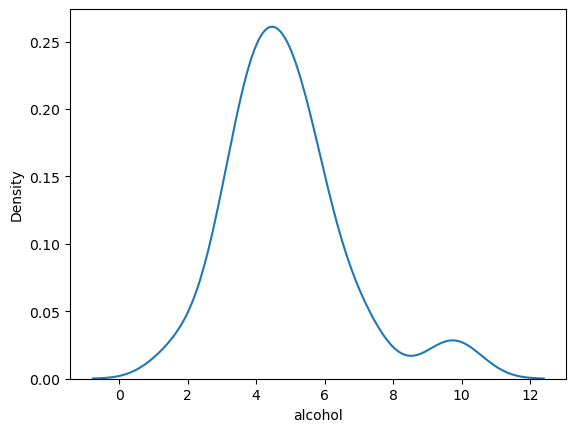

In [16]:
# get kde plot
sb.kdeplot(crash_df["alcohol"])

## Pair Plots

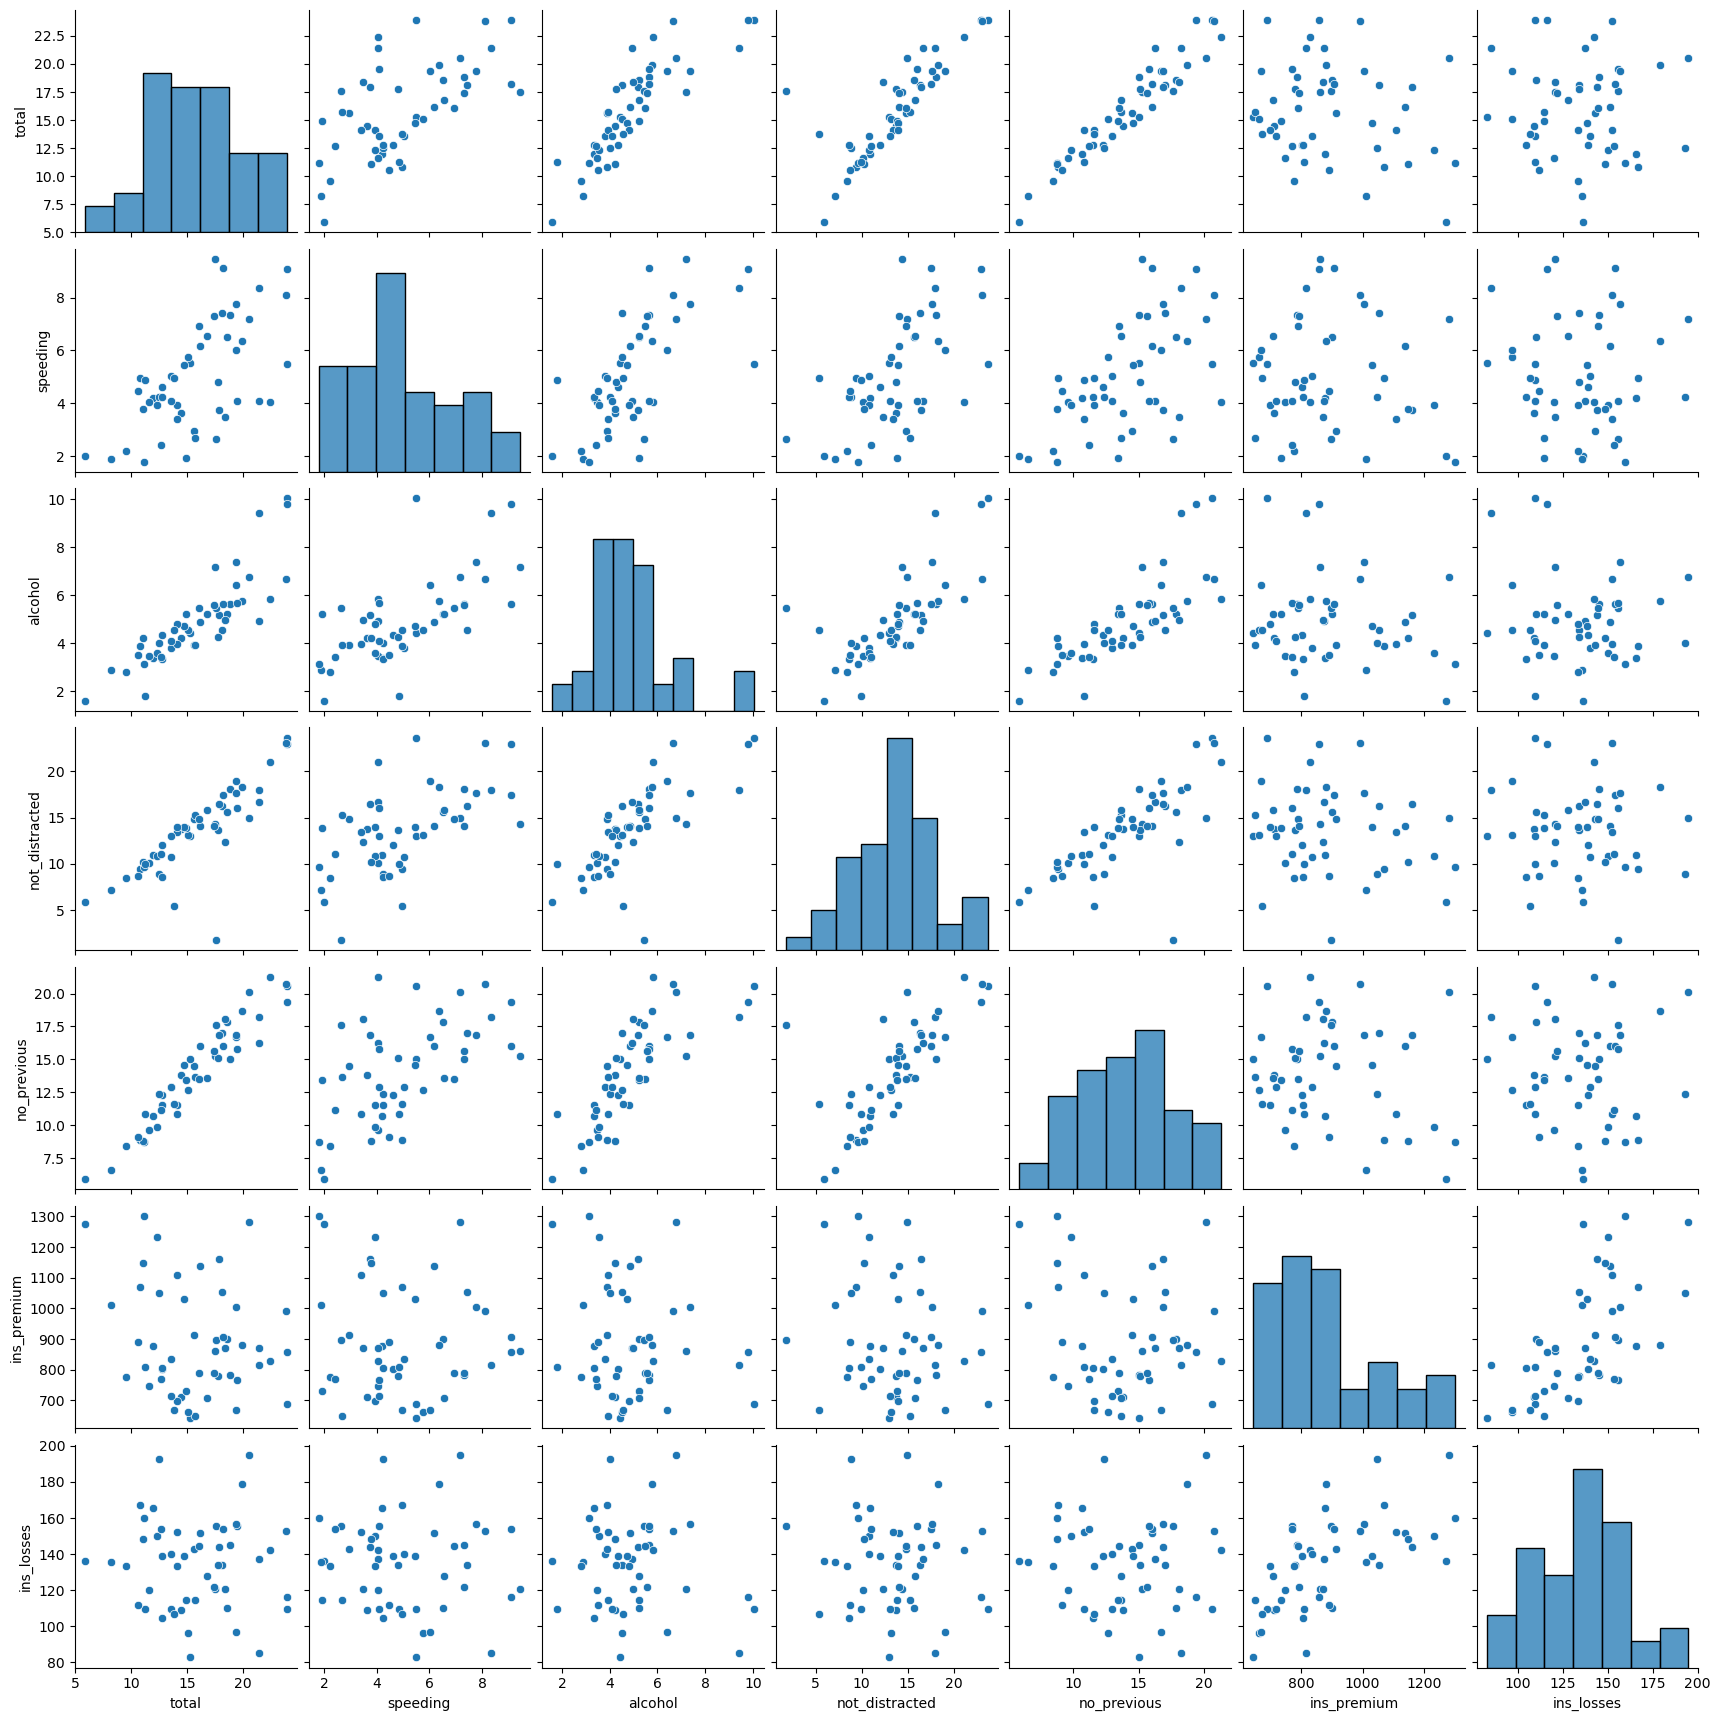

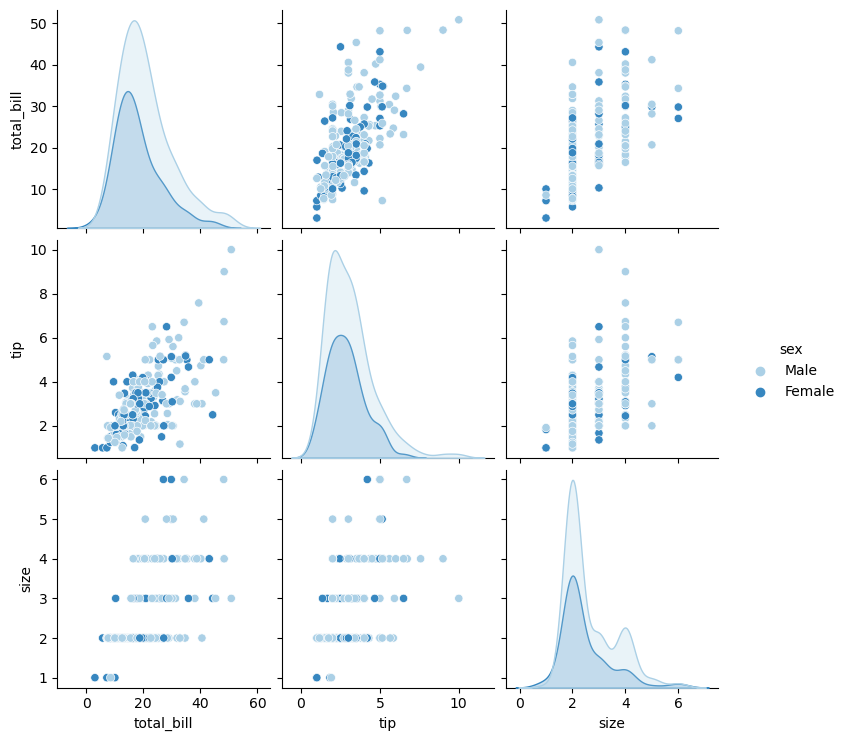

In [17]:
# Pair plots plot relationships across entire data frame's numerical values
sb.pairplot(crash_df)

# load data onto tips
tips_df = sb.load_dataset("tips")

#  with hue you can pass in a category column, and the charts will be colourised
# you can use colour maps from matplotlib to define colours
sb.pairplot(tips_df, hue="sex", palette="Blues")

## Rug Plot

<AxesSubplot:xlabel='tip'>

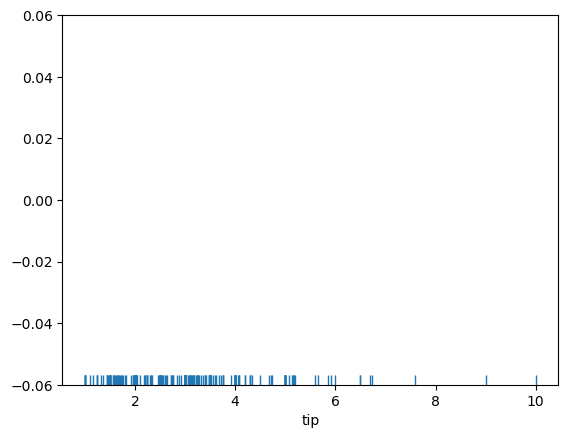

In [18]:
# plots a row of data points in an array
# you'll see greater density where the amount is most common
sb.rugplot(tips_df["tip"])

## Styling

<Figure size 800x400 with 0 Axes>

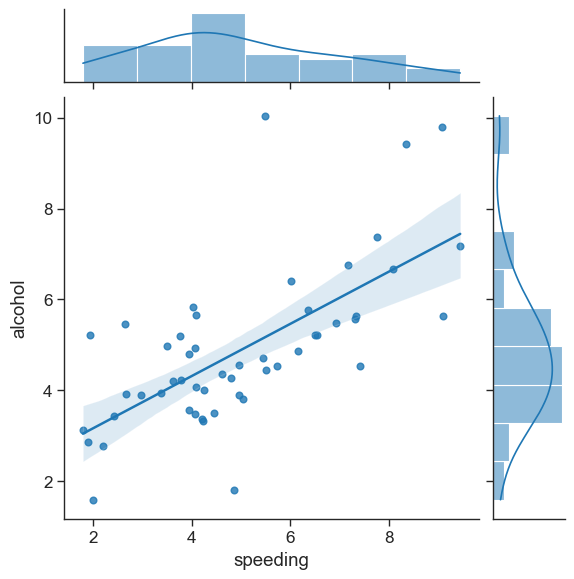

In [23]:
# You can set styles for axes and grids
# white, darkgrid, whitegrid, dark, ticks
sb.set_style("ticks")

plot.figure(figsize=(8,4))

# change size of labels, lines and other elements
# context - how the data is presented (paper, talk, poster)
sb.set_context("paper", font_scale=1.4)

sb.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

# remove spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sb.despine(left=False, bottom=False)

## Categorical Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

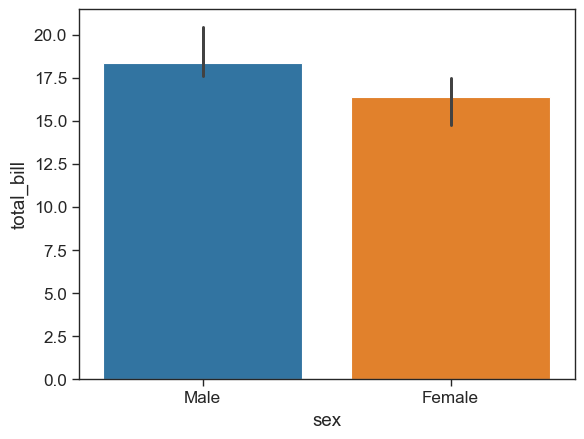

In [24]:
# aggregate data based on a function
# estimator can use numpy functions like median, std, var, cov, or custom
# default for estimator is mean
sb.barplot(x="sex", y ="total_bill", data=tips_df, estimator=np.median)

## Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

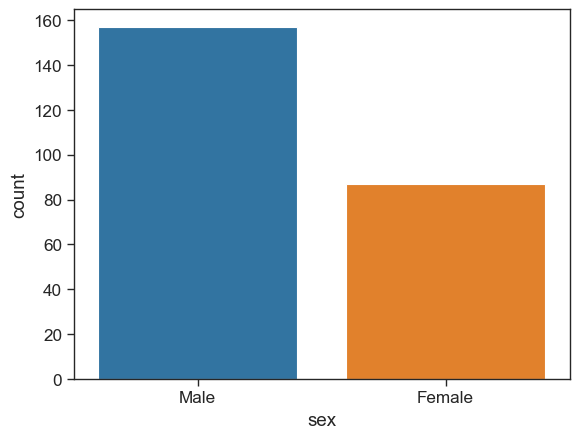

In [26]:
# count plots are like bar plots, but estimater counts number of occurrences

sb.countplot(x="sex", data=tips_df)

## Box Plot

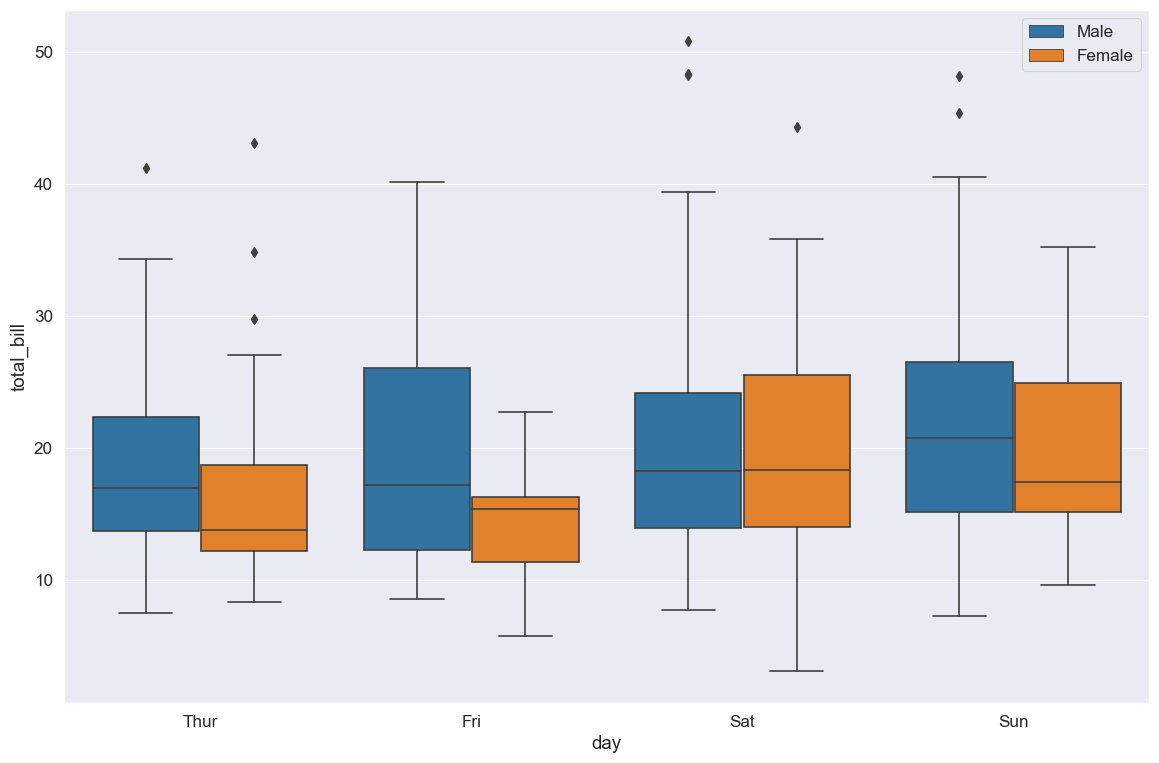

In [27]:
plot.figure(figsize=(14,9))
sb.set_style("darkgrid")

# box plot can compare different variables
# bar in the middle is the median, box extends one standard deviation from the middle
# whiskers extend to all points except outliers
# hue parameter can add another category
# data shows men spend more on friday and less than women on saturday

sb.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

plot.legend(loc=0)

## Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

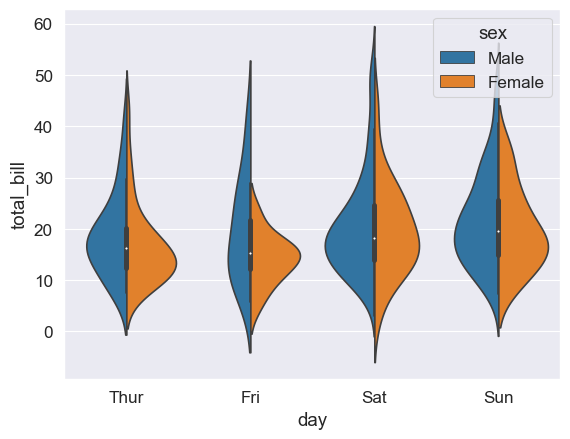

In [28]:
# violin plot combines boxplot and kde
# violin plot uses the kde estimation, box plot uses the datapoints
# split compares the categories to each other

sb.violinplot(x="day", y="total_bill", data=tips_df, hue="sex", split=True)

## Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

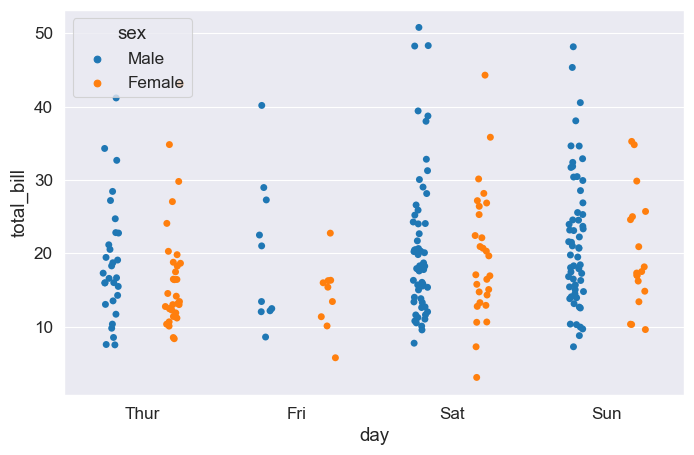

In [29]:
plot.figure(figsize=(8,5))

# strip plot draws a scatter plot representing all datapoints
# used to show observations with a box plot that represents average distribution
# jitter parameter spreads data points so they don't stack over
# dodge splits the data into men and women
# Hue breaks data into men and women
# Dodge separates the men and women data
sb.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

## Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

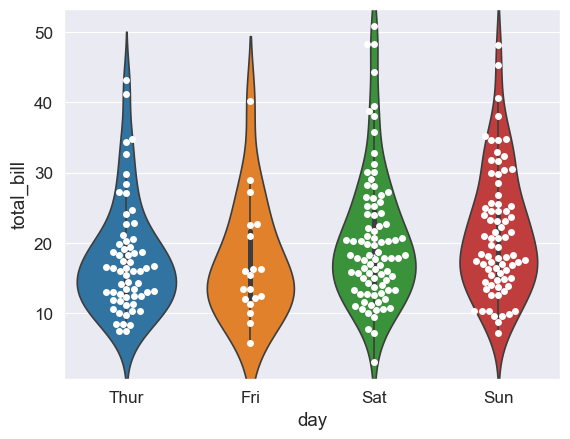

In [32]:
## a mix of violin and strip plots
#sb.swarmplot(x="day", y="total_bill", data=tips_df)

# You can stack a violin plot with a swarm
sb.violinplot(x='day',y='total_bill',data=tips_df)
sb.swarmplot(x='day',y='total_bill',data=tips_df, color='white')

## Palettes

In [ ]:
plot.figure(figsize=(8,6))
sb.set_style("dark")
sb.set_context("talk")

# you can use marplotlib colour maps for styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sb.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plot.legend(loc=0)


## Heatmaps

In [ ]:
plot.figure(figsize=(8,6))
sb.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sb.heatmap(crash_mx, annot=True, cmap='Blues')



<AxesSubplot:xlabel='year', ylabel='month'>

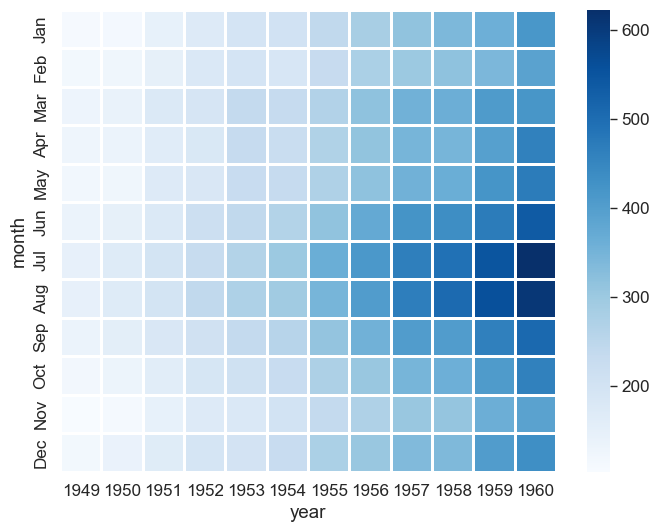

In [33]:
plot.figure(figsize=(8,6))
sb.set_context("paper",font_scale=1.4)

# we can create a matric with an index of month, columns representing years
# we can see flights have increased over time and that June-August is the busiest period

flights = sb.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sb.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)


## Pair Grid

<Figure size 800x600 with 0 Axes>

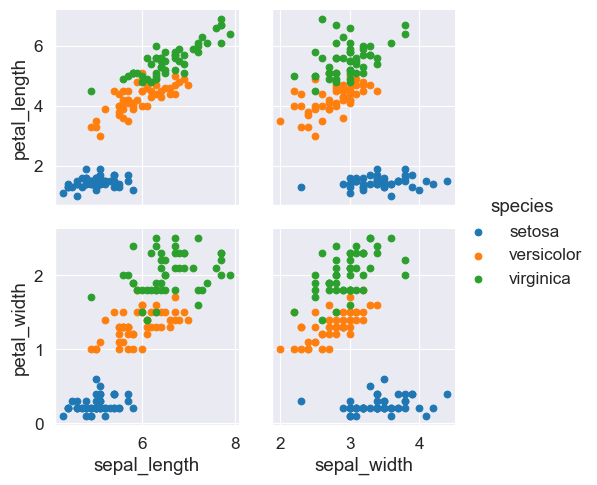

In [36]:
plot.figure(figsize=(8,6))
sb.set_context('paper', font_scale=1.4)

# dataset on iris flowers and petal lengths
iris = sb.load_dataset("iris")

# can grid different plots with pari grid
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sb.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plot.scatter)

# Add a legend last
iris_g.add_legend()

## Facet Grid

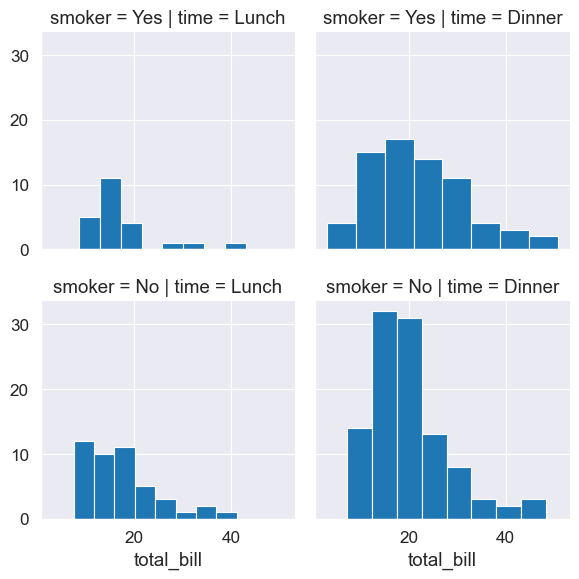

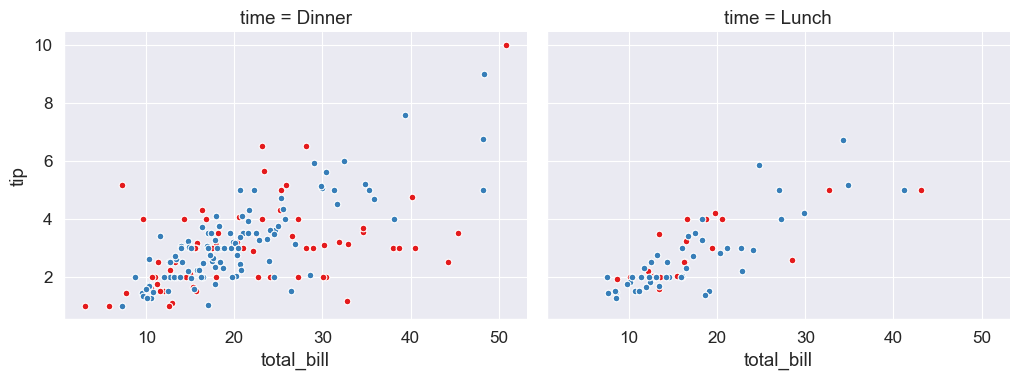

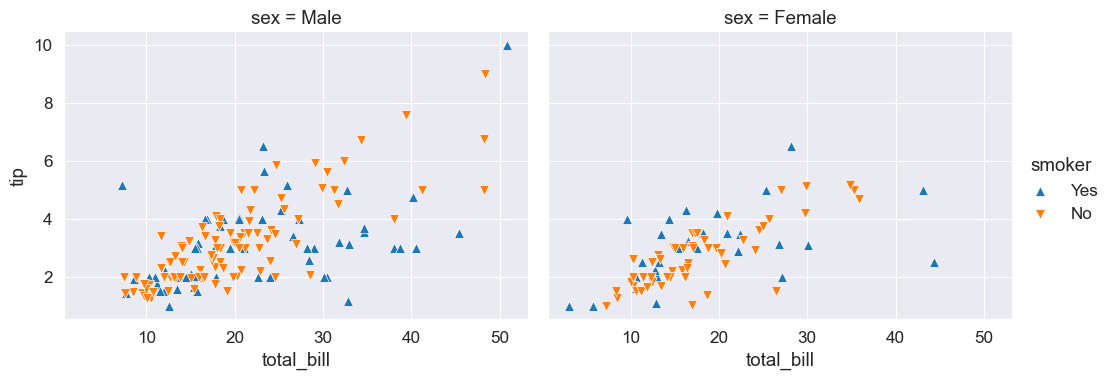

In [41]:
# can print multiple plots in a grid with defined rows and columns
tips_fg = sb.FacetGrid(tips_df, col="time", row="smoker")

# you can pass in attributes for the histogram
tips_fg.map(plot.hist, "total_bill", bins=8)

# can assign variables to different colours and increase size of grid
# aspect is 1.3 x height
tips_fg = sb.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                       col_order=['Dinner', 'Lunch'], palette='Set1')

# define size, line width and assign colour white (w) to markers
tips_fg.map(plot.scatter, "total_bill", "tip", edgecolor='w')

kws = dict(s=50, linewidth=.5, edgecolor="w")

# Define that we want to assign different markers to smokers and non
tips_fg = sb.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=['Yes','No'], 
                        hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plot.scatter, "total_bill", "tip", **kws)
tips_fg.add_legend()


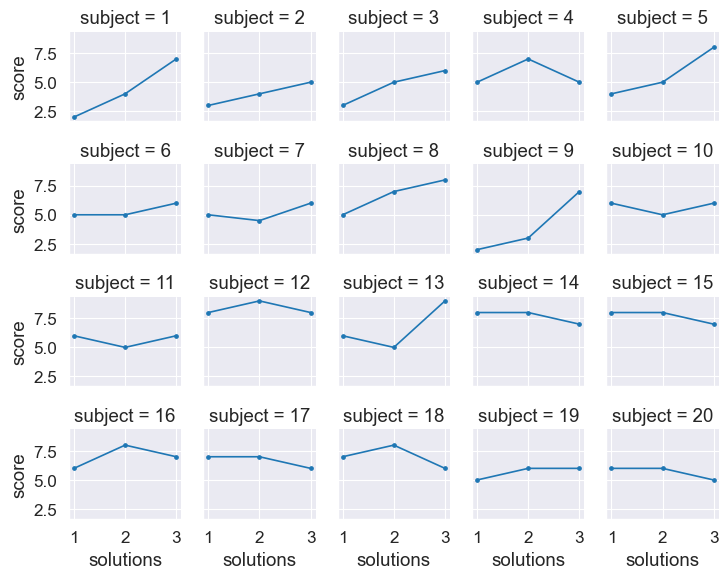

In [42]:
# this dataframe includes student scores for different levels of attention
att_df = sb.load_dataset("attention")
# put each person in their own plot
att_fg = sb.FacetGrid(att_df, col="subject", col_wrap=5, height=1.5)
att_fg.map(plot.plot, "solutions", "score", marker=".")

## Regression Plots

<Figure size 800x600 with 0 Axes>

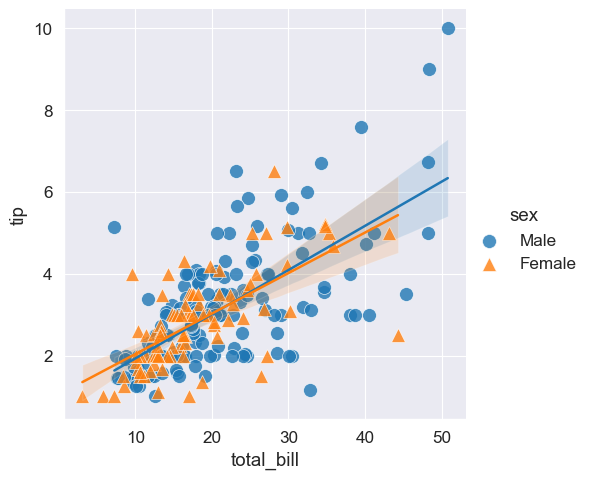

In [44]:
plot.figure(figsize=(8,6))
sb.set_context("paper", font_scale=1.4)

# lmplot combines regression plots with facet grid
# we can plot a regression plot to look at whether total bill affects the tip
# hue spereates the categorical data
# we see that men tend to tip more
# markers = define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sb.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

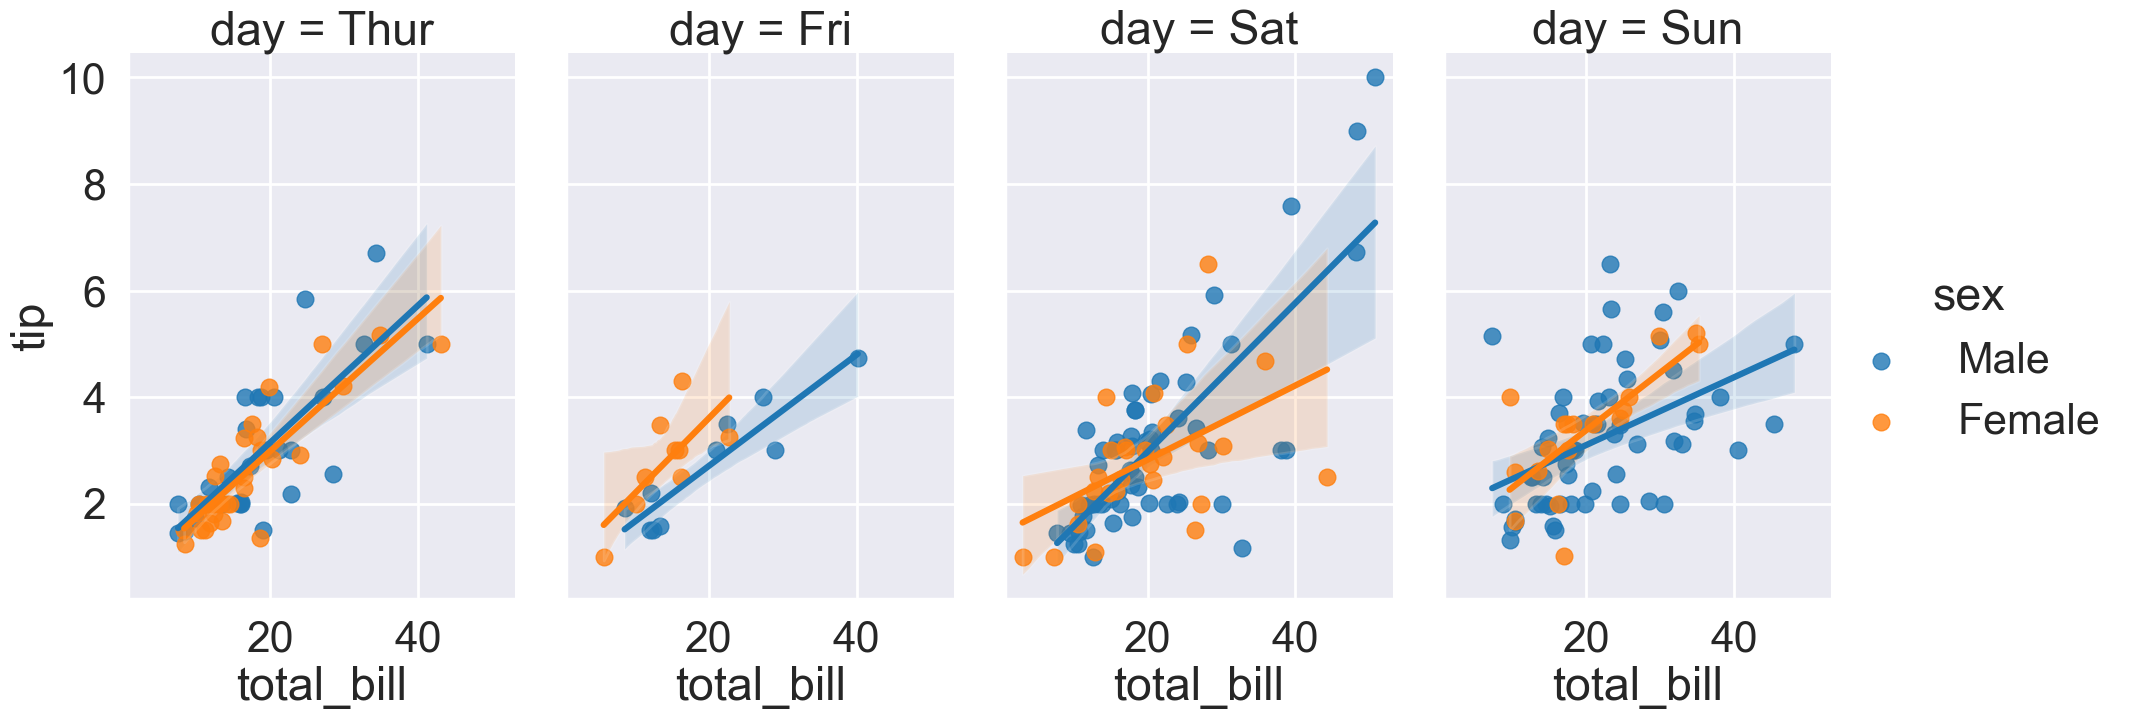

In [46]:
# seperate the data into seperate columns of each individual day
# sb.lmplot(x="total_bill", y="tip", col="sex", row="time", data=tips_df)

# make fonts readable
sb.set_context("poster", font_scale=1.4)

sb.lmplot(x="total_bill", y="tip", data=tips_df, col="day", hue="sex", height=8, aspect=0.6)